# 손글씨 분류하기

## 1. 필요한 모듈 import

In [102]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import time

## 2. 데이터 로드

In [82]:
digits = load_digits()

## 3. 데이터 확인

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

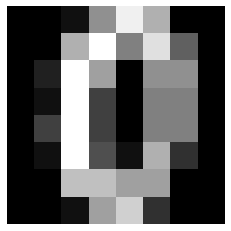

In [105]:
print(digits.DESCR)

digits_data = digits.data
digits_features = digits.feature_names
digits_label = digits.target

plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

## 4. 훈련/테스트용 데이터 분리



In [108]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=8)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}\nX_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (1437, 64), y_train: (1437,)
X_test: (360, 64), y_test: (360,)


## 5. 학습

### 5.1. Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
start = time.time()
tree.fit(X_train, y_train)
print("학습소요시간: %.3f초" % (time.time() - start))
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

학습소요시간: 0.026초
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.75      0.89      0.81        37
           2       0.79      0.81      0.80        32
           3       0.86      0.79      0.82        38
           4       0.88      0.85      0.86        26
           5       0.88      0.86      0.87        49
           6       0.91      0.84      0.87        37
           7       0.95      0.93      0.94        40
           8       0.68      0.70      0.69        33
           9       0.79      0.76      0.78        34

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



### 5.2. Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
start = time.time()
forest.fit(X_train, y_train)
print("학습소요시간: %.3f초" % (time.time() - start))
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))

학습소요시간: 0.408초
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.95      0.97      0.96        37
           2       1.00      1.00      1.00        32
           3       1.00      0.87      0.93        38
           4       1.00      0.92      0.96        26
           5       0.94      0.98      0.96        49
           6       1.00      1.00      1.00        37
           7       0.93      1.00      0.96        40
           8       0.97      0.94      0.95        33
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### 5.3. SVM

In [111]:
from sklearn.svm import SVC

svc = SVC()
start = time.time()
svc.fit(X_train, y_train)
print("학습소요시간: %.3f초" % (time.time() - start))
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

학습소요시간: 0.116초
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.93      1.00      0.96        37
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.99        38
           4       1.00      0.96      0.98        26
           5       0.96      0.98      0.97        49
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.97      0.91      0.94        33
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### 5.4. SGD Classifier

In [112]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
start = time.time()
sgd.fit(X_train, y_train)
print("학습소요시간: %.3f초" % (time.time() - start))
y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred))

학습소요시간: 0.108초
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.84      0.97      0.90        37
           2       1.00      1.00      1.00        32
           3       0.97      0.92      0.95        38
           4       1.00      0.96      0.98        26
           5       0.96      0.96      0.96        49
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.98        40
           8       1.00      0.85      0.92        33
           9       0.88      0.88      0.88        34

    accuracy                           0.96       360
   macro avg       0.96      0.95      0.96       360
weighted avg       0.96      0.96      0.96       360



### 5.4. Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

# max_iter : 해를 찾아가기위해 반복하는 횟수를 제한
logistic = LogisticRegression(max_iter=2700)
start = time.time()
logistic.fit(X_train, y_train)
print("학습소요시간: %.3f초" % (time.time() - start))
y_pred = logistic.predict(X_test)

print(classification_report(y_test, y_pred))

학습소요시간: 2.344초
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.92      0.97      0.95        37
           2       1.00      1.00      1.00        32
           3       1.00      0.95      0.97        38
           4       1.00      0.96      0.98        26
           5       0.96      0.96      0.96        49
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.88      0.91      0.90        33
           9       0.91      0.91      0.91        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## 6. 결과

### 6.1. 모델 평가
* 클래스별로 훈련에 사용된 데이터의 갯수가 비슷하기 때문에 accuracy로 평가하기로 했다.
* Decision Tree를 제외하고 나머지 알고리즘들은 모드 0.96 이상의 높은 정확도를 보였다.
* Decision Tree는 학습에 걸리는 시간이 매우 짧은 대신 상대적으로 낮은 정확도를 가졌다.
* Random Forest와 LogisticRegression은 0.97의 높은 정확도를 가졌지만 각각 0.408초와 2.344초로 학습에 필요한 시간이 길었다.
* SVM와 SGD는 학습속도도 0.1초 정도로 빠르고 정확도도 높았다.
